## Week 10: Lecture 2

Following a review of functions, we will look at p-values for hypothesis testing. Here we try to validate assumptions in a model by comparing a sample to a population. The assumptions allow us to use simulation to understand the process behind the population generating the samples. We will use numbers instead of visualizations to inform the choice between null hyptothesis and alternative hypothesis. 

In [1]:
# some data science packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# some helpful functions we wrote for you

from helper_functions import *

### Exercise (Finding Middle Value)

**(a)** Write a function called `remaining_values` such that 

- Input: A list of numbers. For example, we could input `[4.5, -10, 0]`.
- Output: Another list with all of the entries of the input except the first entry. For example `[-10, 4.5]`.

Try to use the Python function `len` to help you check the number of positions in the input.

In [29]:
# TRY IT!

In [30]:
remaining_values([-10, 0, 4.5])

[0, 4.5]

**(b)** Suppose we have a list of numbers sorted in ascending order. What is the middle value?

Write a function called `find_middle` such that 

- Input: A list of numbers sorted in ascending order. For example `[-10, 0, 4.5]`.
- Output: The value of the middle number. For example `0`.

Try to use `remaining_values` from Exercise (a)

In [25]:
# CAN YOU FIGURE OUT THE CODE?! TRY USING A print STATEMENT

def find_middle(sorted_list):
    entries_to_left = []
    entries_to_right = sorted_list
    
    while len(entries_to_left) < len(entries_to_right):
        new_entry_to_left = entries_to_right[0]
        entries_to_left.append(new_entry_to_left)
        
        entries_to_right = remaining_values(entries_to_right)
    
    return new_entry_to_left

In [28]:
find_middle([-10, 0, 4.5])

1

**Observations**

- We can use the Python functions 
 * `sorted()` to sort the entries of a list 
 * `len` to compute the length of a list
 * `.append()` to add entries to the right hand side of a list
- We can add `print` statements to understand the behavior of the code. Especially code written by a friend.

### Example (Student Grades)

In [2]:
scores = pd.read_csv('scores_by_section.csv')
scores.head()

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20


In [3]:
scores.groupby('Section').mean()

,Midterm
Section,
1,15.593750
2,15.125000
3,13.666667
4,14.766667
5,17.454545
6,15.031250
7,16.625000
8,16.310345
9,14.566667


In [4]:
observed_average = 13.6667

In [5]:
random_sample = sample_without_replacement(27, scores["Midterm"])
random_sample

array([11, 17, 11, 17, 16, 15, 17, 21,  9, 13, 21, 17, 23, 14, 22, 20, 17,
       24, 12, 21, 23, 18, 13, 24, 14, 13, 19], dtype=int64)

In [6]:
np.average(random_sample)

17.11111111111111

Simulate one value of the test statistic under the hypothesis that the section is like a random sample from the class

In [8]:
def random_sample_average():
    random_sample = sample_without_replacement(27, scores["Midterm"])
    return np.average(random_sample)

Simulate 50,000 copies of the test statistic

In [9]:
trials = 50000
sample_averages = []

for counter in range(50000):
    sample_averages.append(random_sample_average())    

In [ ]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

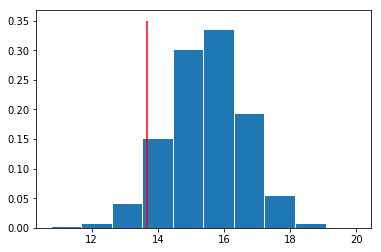

In [14]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.vlines(x=observed_average, ymin=0, ymax=0.35, color = "r");

In [15]:
how_many_less_than = 0

for value in sample_averages:
    if value <= observed_average:
        how_many_less_than = how_many_less_than + 1

how_many_less_than / trials

0.0572

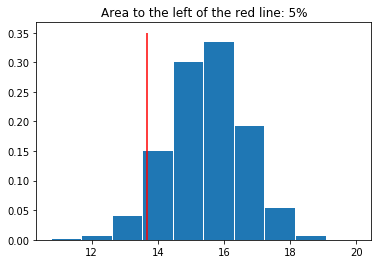

In [18]:
plt.hist(sample_averages, density = True, rwidth = 0.97)
plt.vlines(x=observed_average, ymin=0, ymax=0.35, color = "r")
plt.title('Area to the left of the red line: 5%');